# Simple Classification Example using Custom Data

In [2]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     -------------------------------------- 165.5/165.5 kB 4.9 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.5-cp311-cp311-win_amd64.whl.metadata (6.5 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.4/8.0 MB 11.2 MB/s eta 0:00:01
   ---- ----------------------------------- 0.8/8.0 MB 10.5 MB/s eta 0:00:01
   ------ --------------------------------- 1.4/8.0 MB 10.9 MB/s eta 0:00:01
   --------- ------------------------------ 1.9/8.0 MB 11.0 MB/s eta 0:00:01
   ------------ --------------------------- 2.4/8.0 MB 11.1 MB/s eta 0:00:01
   --------------- ------------------------ 3.0/8.0 MB 11.2 MB/s eta 0:00:01
   ----------------- ---------------------- 3.6/8.0 MB 11.3 MB/s eta 0:00:01
   -------------------- ---------


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


 Basic Classification using example Predicting Customer Purchase predict if customer will the product or not

In [37]:
# Import required libraries we will use it latter in code
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [25]:
# Here we are Generating some random data to match with our example so that we can understand the concept
np.random.seed(0)
data = {
    'Age': np.random.randint(18, 65, size=1000),
    'Income': np.random.normal(50000, 15000, size=1000),
    'Gender': np.random.choice(['Male', 'Female'], size=1000),
    'Clicked Ad': np.random.randint(0, 2, size=1000),
    'Purchased': np.random.randint(0, 2, size=1000)
}

df = pd.DataFrame(data)

# this is Our Raw Data without any pre processing
df.head()

,Age,Income,Gender,Clicked Ad,Purchased
0,62,45555.122131,Male,1,1
1,18,65804.763968,Female,1,0
2,21,46425.190744,Female,1,0
3,21,49113.056130,Male,0,1
4,57,72423.354896,Female,1,0


In [29]:
# Convert categorical variables to numerical labels we will see output later on
label_encoder = LabelEncoder()

# Machine not understand the string values so we needs to convert them into numeric  values 
df['Gender'] = label_encoder.fit_transform(df['Gender'])

df.head()


,Age,Income,Gender,Clicked Ad,Purchased
0,62,45555.122131,1,1,1
1,18,65804.763968,0,1,0
2,21,46425.190744,0,1,0
3,21,49113.056130,1,0,1
4,57,72423.354896,0,1,0


In [31]:
# Split the data into training and test sets
X = df[['Age', 'Income', 'Gender', 'Clicked Ad']].values

# We have stored Purchased in y value as we this is our prediction result 
y = df['Purchased'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# here we have 800 records with 4 columns  ['Age', 'Income', 'Gender', 'Clicked Ad']
print(X_train.shape)

X_train

(800, 4)


array([[3.30000000e+01, 5.11400327e+04, 1.00000000e+00, 0.00000000e+00],
       [3.80000000e+01, 8.23629672e+04, 0.00000000e+00, 1.00000000e+00],
       [2.10000000e+01, 5.51546282e+04, 1.00000000e+00, 0.00000000e+00],
       ...,
       [5.60000000e+01, 6.27118392e+04, 0.00000000e+00, 0.00000000e+00],
       [6.00000000e+01, 4.86448798e+04, 0.00000000e+00, 0.00000000e+00],
       [5.40000000e+01, 5.82518531e+04, 1.00000000e+00, 0.00000000e+00]])

it's often beneficial to standardize or normalize your data before feeding it into a model


Why Standardization?
Equal Scaling: Standardizing the data ensures that all features have the same scale. This is important for algorithms that rely on distance metrics or gradient-based optimization (like neural networks and SVMs) because features with larger scales can dominate those with smaller scales.

Mean Centering: It centers the data around 0, which can make convergence faster during model training and helps algorithms reach optimal performance.

Avoiding Biased Results: It prevents certain features from dominating solely because of their larger numerical range.

In [36]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Build the model architecture

In [39]:
(X_train.shape[1],)

(4,)

In [52]:
# we are creating a model using tensor flow library
# X_train.shape[1]  code help to identify input shape

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 32 neurons, ReLU activation
    Dense(32, activation='relu'),  # Hidden layer with 16 neurons, ReLU activation
    Dense(1, activation='sigmoid')  # Output layer with 1 neuron, Sigmoid activation for binary classification
])

# Step 2: Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),  # Adam optimizer with learning rate 0.001
              loss='binary_crossentropy',  # Binary cross-entropy loss function for binary classification
              metrics=['accuracy'])  # Evaluation metric to monitor during training is accuracy

# Step 3: Train the model
history = model.fit(X_train, y_train,  # Training data and labels
                    epochs=100,  # Number of epochs (iterations over the entire training data)
                    batch_size=32,  # Number of samples per gradient update
                    validation_split=0.2)  # Fraction of training data to be used as validation data

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4836 - loss: 0.7152 - val_accuracy: 0.5625 - val_loss: 0.6830
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5342 - loss: 0.6902 - val_accuracy: 0.5625 - val_loss: 0.6877
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5609 - loss: 0.6845 - val_accuracy: 0.5437 - val_loss: 0.6925
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5515 - loss: 0.6880 - val_accuracy: 0.5625 - val_loss: 0.6980
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5513 - loss: 0.6853 - val_accuracy: 0.5562 - val_loss: 0.6990
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5642 - loss: 0.6799 - val_accuracy: 0.5312 - val_loss: 0.7038
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5647 - loss: 0.6813 - val_accuracy: 0.5500 - val_loss: 0.7008
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5857 - loss: 0.6725 - val_accuracy: 0.5500 - v

In [53]:
history.model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,301 (28.52 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,868 (19.02 KB)

3. Evaluate the Model
Evaluate the model using the test data:

In [54]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - accuracy: 0.5220 - loss: 0.7221
Test Accuracy: 0.5149999856948853


4. Plot Training History (Optional)
Optionally, you can plot the training history:

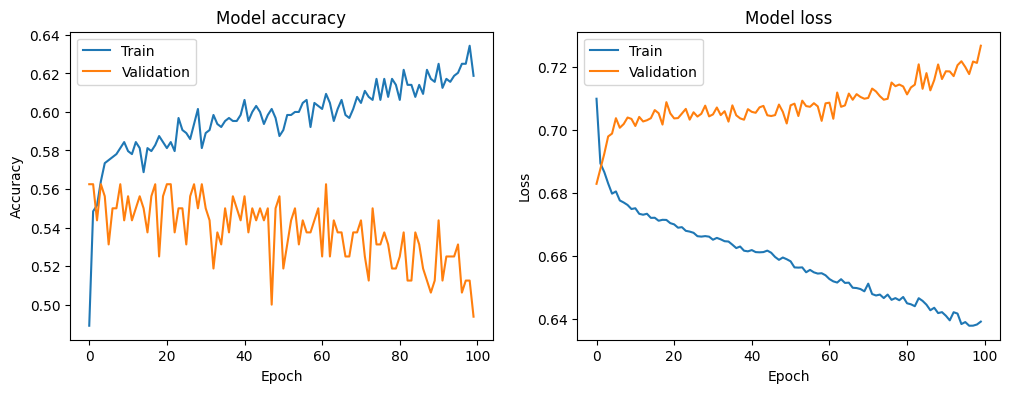

In [55]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()